In [ ]:
import pandas as pd
df = pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


In [ ]:
#Функция для классификации фильмов
def classify_movies(row):
  rating = row['rating']
  if rating <= 2.0:
    return 'Низкий рейтинг'
  elif rating <= 4.0:
    return 'средний рейтинг'
  else:
    return 'высокий рейтинг'


In [ ]:
#Применение функции к каждой строке
df['class'] = df.apply(classify_movies, axis = 1)
df.head()

,userId,movieId,rating,timestamp,class
0,1,296,5.0,1.147880e+09,высокий рейтинг
1,1,306,3.5,1.147869e+09,средний рейтинг
2,1,307,5.0,1.147869e+09,высокий рейтинг
3,1,665,5.0,1.147879e+09,высокий рейтинг
4,1,899,3.5,1.147869e+09,средний рейтинг


In [ ]:
df = pd.read_csv('keywords.csv')
df.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [ ]:
def classify_by_geo(query, geo_data):
    for region, cities in geo_data.items():
        for city in cities:
            if city in query:
                return region
    return 'undefined'

In [ ]:
# Словарь с гео-данными
geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

# Классификация по регионам
df['region'] = df['keyword'].apply(classify_by_geo, geo_data=geo_data)

# Вывод результата
df.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [ ]:
df1 = pd.read_csv('movies.csv')
df2 = pd.read_csv('ratings.csv')
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# список всех годов
years = list(range(1950, 2011))

# функция вычленения года выпуска фильма
def production_year(title):
    for year in years:
        if str(year) in title:
            return year
    return 1900

# добавление столбца year к датафрейму movies
df1['year'] = df1['title'].apply(production_year)

# объединение таблиц movies и ratings по столбцу movieId
joined = df2.merge(df1, on='movieId', how='left')

# группировка по году выпуска и расчет среднего рейтинга
ratings_by_year = joined.groupby('year')['rating'].mean().reset_index()

# сортировка по убыванию рейтинга
ratings_by_year = ratings_by_year.sort_values(by='rating', ascending=False)

print(ratings_by_year)

    year    rating
8   1957  3.999492
5   1954  3.985693
23  1972  3.956477
13  1962  3.929445
3   1952  3.895315
..   ...       ...
41  1990  3.435736
56  2005  3.434087
51  2000  3.420897
48  1997  3.410704
47  1996  3.352833

[62 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-41-a0401af67f57>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='year', ylabel='rating'>

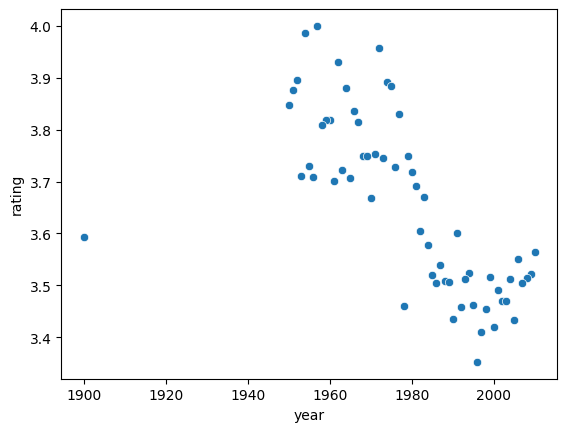

In [ ]:
sns.scatterplot(
    x = "year",
    y = "rating",
    palette = "hls",
    data = ratings_by_year
)

In [ ]:
#Примерно до 1980 года рейтинг фильмов лучше, чем после 1980-х годов.